In [135]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [89]:
# reading in final dataframe
kahuna = pd.read_csv('../data/added_data/kahuna.csv')

In [90]:
df1 = kahuna.copy()

-------------------------

## KMeans Clustering

In [5]:
X = kahuna.drop(columns=['Entity', 'Year'])
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [10]:
from scipy.spatial.distance import cdist, pdist

Number of Clusters: 1 	Average Distortion: 3.428016342180774
Number of Clusters: 2 	Average Distortion: 3.1217945014615798
Number of Clusters: 3 	Average Distortion: 2.982380039455774
Number of Clusters: 4 	Average Distortion: 2.565204275047013
Number of Clusters: 5 	Average Distortion: 2.4810774889805005
Number of Clusters: 6 	Average Distortion: 2.342177797220058
Number of Clusters: 7 	Average Distortion: 2.18430902276487
Number of Clusters: 8 	Average Distortion: 2.1053095381894127


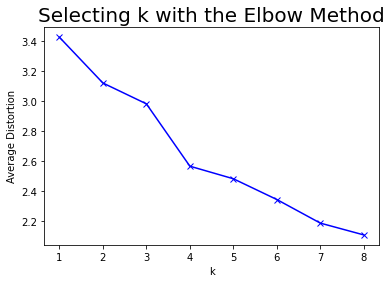

In [11]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(X_sc)
    prediction = model.predict(X_sc)
    distortion = (
        sum(np.min(cdist(X_sc, model.cluster_centers_, "euclidean"), axis=1))
        / X_sc.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [17]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

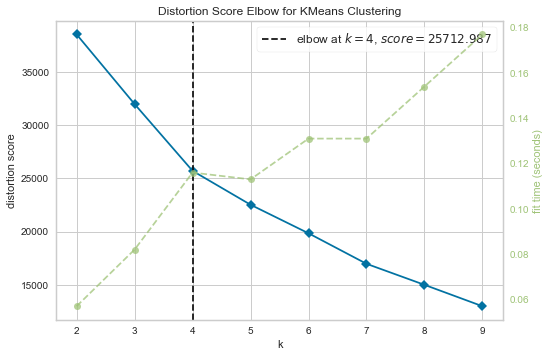

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(X_sc)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [201]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [202]:
km.cluster_centers_;

In [203]:
kahuna['cluster'] = km.labels_
kahuna.head()

Entity  Year   Deaths %  CO2 Emissions  CO2 Emissions Per Cap  \
0  Albania  1991  17.613636        4228256                 1.2889   
1  Albania  1995  16.789055        2066496                 0.6638   
2  Albania  1996  16.588451        1993216                 0.6432   
3  Albania  1997  15.081361        1531552                 0.4941   
4  Albania  1998  15.965796        1744064                 0.5607   

   Food Emissions  Total GHG  Consumption of Ozone  Shared CO2 Emissions  \
0       4011691.0  9030000.0                   0.0                  0.02   
1       4861321.1  7480000.0                  43.4                  0.01   
2       4569702.9  7280000.0                  43.2                  0.01   
3       4431656.7  6510000.0                  45.2                  0.01   
4       4344061.6  6810000.0                  49.6                  0.01   

   Transport  ...  Death_5-14  Death_50-69   Death_70+  Death_15-49  Urban%  \
0   500000.0  ...    5.975427   271.661092  512.126572    60.714220  36.700   
1   600000.0  ...    4.580403   240.740486  469.406670    49.692924  38.911   
2   600000.0  ...    4.373679   255.560407  491.357876    52.069689  39.473   
3   500000.0  ...    4.414006   269.448518  521.197486    57.988035  40.035   
4   700000.0  ...    4.493629   280.472022  547.315668    64.973478  40.601   

   Child Mortality  Population          GDP  Forest area  cluster  
0             3.93  119.225912  3496.580246     786850.0        0  
1             3.39  116.342482  4471.871070     779050.0        0  
2             3.26  115.621642  4909.228105     777100.0        0  
3             3.13  114.900766  4400.577827     775150.0        0  
4             2.99  114.179927  4819.387534     773200.0        0  

[5 rows x 27 columns]

In [113]:
# comparision of numerical representations of clusters means
kahuna.groupby('cluster').mean().T

cluster                                  0             1             2
Year                          2.002240e+03  2.001500e+03  2.001500e+03
Deaths %                      1.069664e+01  1.983135e+01  3.911636e+00
CO2 Emissions                 1.028777e+08  3.149207e+09  5.664404e+09
CO2 Emissions Per Cap         5.169476e+00  2.463833e+00  1.994650e+01
Food Emissions                1.029963e+08  1.432680e+09  1.411459e+09
Total GHG                     1.954523e+08  3.915459e+09  6.159870e+09
Consumption of Ozone          1.187150e+03  3.551738e+04  4.746796e+04
Shared CO2 Emissions          3.708344e-01  1.093333e+01  2.097917e+01
Transport                     2.030077e+07  2.191417e+08  1.637742e+09
Death_rate_ambient_ozone_pol  2.304762e+00  1.621379e+01  3.014308e+00
Death_rate_household_air_pol  6.246866e+01  1.321593e+02  7.250909e-02
Death_rate_all_causes         5.540937e+01  8.002124e+01  2.098069e+01
Death_actual_ozone            4.436952e+02  1.027083e+05  1.260691e+04
Death_actual_particulate      1.061550e+04  6.560596e+05  8.076044e+04
Death_actual_household        1.365193e+04  9.306099e+05  2.773371e+02
Death_under5                  1.316642e+03  6.091231e+04  9.641439e+02
Death_5-14                    3.425100e+01  1.765129e+03  7.433022e+00
Death_50-69                   3.641861e+03  2.280127e+05  2.605672e+04
Death_70+                     4.986685e+03  4.119236e+05  6.142555e+04
Death_15-49                   1.079754e+03  5.615419e+04  4.913515e+03
Urban%                        5.806674e+01  3.354469e+01  7.887479e+01
Child Mortality               4.473239e+00  5.998958e+00  8.579167e-01
Population                    1.808556e+02  2.490085e+02  3.112386e+01
GDP                           1.580694e+04  3.911556e+03  4.930289e+04
Forest area                   3.098597e+07  1.243952e+08  3.051919e+08

In [30]:
columns = kahuna.columns.drop(['Entity', 'cluster', 'Year'])

In [31]:
km.cluster_centers_;

In [32]:
kahuna.shape

(2409, 27)

In [33]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=columns
)
centroids.T

0             1             2  \
Deaths %                      8.763674e+00  3.911636e+00  1.418016e+01   
CO2 Emissions                 1.457661e+08  5.664404e+09  2.558610e+07   
CO2 Emissions Per Cap         7.629768e+00  1.994650e+01  7.356402e-01   
Food Emissions                9.371892e+07  1.411459e+09  1.197156e+08   
Total GHG                     2.222096e+08  6.159870e+09  1.472314e+08   
Consumption of Ozone          1.561237e+03  4.746796e+04  5.129879e+02   
Shared CO2 Emissions          5.244112e-01  2.097917e+01  9.406475e-02   
Transport                     2.808024e+07  1.637742e+09  6.280935e+06   
Death_rate_ambient_ozone_pol  1.774759e+00  3.014308e+00  3.259911e+00   
Death_rate_household_air_pol  1.514265e+01  7.250909e-02  1.477576e+02   
Death_rate_all_causes         6.242573e+01  2.098069e+01  4.276479e+01   
Death_actual_ozone            3.422056e+02  1.260691e+04  6.265955e+02   
Death_actual_particulate      1.118238e+04  8.076044e+04  9.593892e+03   
Death_actual_household        2.762039e+03  2.773371e+02  3.327725e+04   
Death_under5                  5.880666e+02  9.641439e+02  2.629650e+03   
Death_5-14                    1.877754e+01  7.433022e+00  6.213663e+01   
Death_50-69                   4.006584e+03  2.605672e+04  2.984573e+03   
Death_70+                     5.796509e+03  6.142555e+04  3.527255e+03   
Death_15-49                   1.114646e+03  4.913515e+03  1.016873e+03   
Urban%                        6.980603e+01  7.887479e+01  3.691066e+01   
Child Mortality               2.150918e+00  8.579167e-01  8.658429e+00   
Population                    2.165135e+02  3.112386e+01  1.165944e+02   
GDP                           2.252153e+04  4.930289e+04  3.706198e+03   
Forest area                   3.734389e+07  3.051919e+08  1.952800e+07   

                                         3  
Deaths %                      1.983135e+01  
CO2 Emissions                 3.149207e+09  
CO2 Emissions Per Cap         2.463833e+00  
Food Emissions                1.432680e+09  
Total GHG                     3.915459e+09  
Consumption of Ozone          3.551738e+04  
Shared CO2 Emissions          1.093333e+01  
Transport                     2.191417e+08  
Death_rate_ambient_ozone_pol  1.621379e+01  
Death_rate_household_air_pol  1.321593e+02  
Death_rate_all_causes         8.002124e+01  
Death_actual_ozone            1.027083e+05  
Death_actual_particulate      6.560596e+05  
Death_actual_household        9.306099e+05  
Death_under5                  6.091231e+04  
Death_5-14                    1.765129e+03  
Death_50-69                   2.280127e+05  
Death_70+                     4.119236e+05  
Death_15-49                   5.615419e+04  
Urban%                        3.354469e+01  
Child Mortality               5.998958e+00  
Population                    2.490085e+02  
GDP                           3.911556e+03  
Forest area                   1.243952e+08

In [39]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((X_sc))
    score = silhouette_score(X_sc, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.7981390902486566)
For n_clusters = 3, the silhouette score is 0.7612867245387583)
For n_clusters = 4, the silhouette score is 0.27662500117516176)
For n_clusters = 5, the silhouette score is 0.2791132606911262)
For n_clusters = 6, the silhouette score is 0.31033346072670365)
For n_clusters = 7, the silhouette score is 0.31737497217549016)
For n_clusters = 8, the silhouette score is 0.3242921878784138)
For n_clusters = 9, the silhouette score is 0.31230075866373397)
For n_clusters = 10, the silhouette score is 0.3250320829001155)


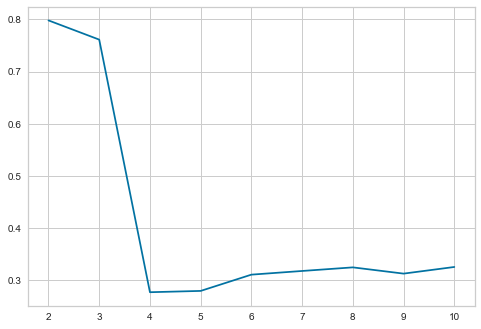

In [41]:
plt.plot(cluster_list, sil_score)
plt.show()

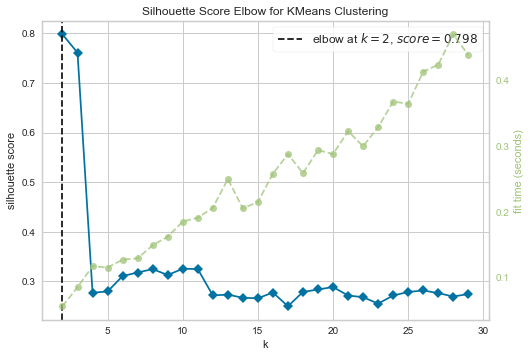

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(X_sc)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [34]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [35]:
score_df.head(11)

k       inertia  silhouette
0    2  38563.314328    0.798139
1    3  32001.744490    0.761287
2    4  25712.987016    0.276625
3    5  22522.389041    0.279113
4    6  19631.994177    0.300913
5    7  16958.832329    0.316833
6    8  14979.813332    0.292704
7    9  12962.770742    0.310387
8   10  11933.770565    0.320688
9   11  10811.316125    0.322484
10  12   9774.126848    0.325814

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');

In [21]:
# group is the largest cluster by far
kahuna['cluster'].value_counts()

0    2337
1      48
2      24
Name: cluster, dtype: int64

In [46]:
km_10 = KMeans(n_clusters=10, random_state=42)
km_10.fit(X_sc)

KMeans(n_clusters=10, random_state=42)

In [47]:
kahuna['clusterx10'] = km_10.labels_

In [55]:
kahuna['clusterx10'].value_counts()

0    1176
3     569
2     398
7     121
9      49
5      24
6      24
4      24
8      14
1      10
Name: clusterx10, dtype: int64

<AxesSubplot:>

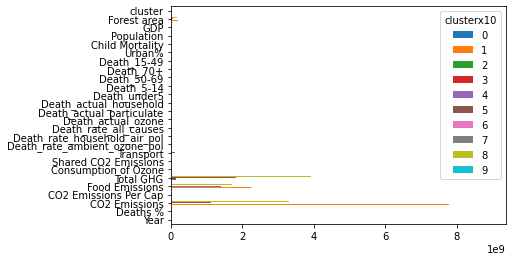

In [51]:
kahuna.groupby(by='clusterx10').mean().T.plot(kind='barh')

In [48]:
kahuna

Entity  Year   Deaths %  CO2 Emissions  CO2 Emissions Per Cap  \
0      Albania  1991  17.613636        4228256                 1.2889   
1      Albania  1995  16.789055        2066496                 0.6638   
2      Albania  1996  16.588451        1993216                 0.6432   
3      Albania  1997  15.081361        1531552                 0.4941   
4      Albania  1998  15.965796        1744064                 0.5607   
...        ...   ...        ...            ...                    ...   
2404  Zimbabwe  2010   9.450169        7878316                 0.6205   
2405  Zimbabwe  2011  10.053401        9743983                 0.7557   
2406  Zimbabwe  2012  10.455091        7882889                 0.6011   
2407  Zimbabwe  2013  10.691584       11836254                 0.8866   
2408  Zimbabwe  2014  10.858493       11905687                 0.8763   

      Food Emissions   Total GHG  Consumption of Ozone  Shared CO2 Emissions  \
0          4011691.0   9030000.0                  0.00                  0.02   
1          4861321.1   7480000.0                 43.40                  0.01   
2          4569702.9   7280000.0                 43.20                  0.01   
3          4431656.7   6510000.0                 45.20                  0.01   
4          4344061.6   6810000.0                 49.60                  0.01   
...              ...         ...                   ...                   ...   
2404      55244889.2  66540000.0                 29.30                  0.02   
2405      53985614.6  67420000.0                 22.22                  0.03   
2406      54211027.7  67630000.0                 16.20                  0.02   
2407      54321218.5  67550000.0                 15.76                  0.03   
2408      51674911.7  66100000.0                 13.32                  0.03   

      Transport  ...  Death_50-69   Death_70+  Death_15-49  Urban%  \
0      500000.0  ...   271.661092  512.126572    60.714220  36.700   
1      600000.0  ...   240.740486  469.406670    49.692924  38.911   
2      600000.0  ...   255.560407  491.357876    52.069689  39.473   
3      500000.0  ...   269.448518  521.197486    57.988035  40.035   
4      700000.0  ...   280.472022  547.315668    64.973478  40.601   
...         ...  ...          ...         ...          ...     ...   
2404  1300000.0  ...   735.443275  684.000846   253.211851  33.196   
2405  2300000.0  ...   750.211216  687.415400   252.443341  33.015   
2406  2600000.0  ...   783.503715  711.735517   258.678699  32.834   
2407  2900000.0  ...   824.426468  740.153224   266.910947  32.654   
2408  2600000.0  ...   865.214818  766.192922   280.271101  32.504   

      Child Mortality  Population          GDP  Forest area  cluster  \
0                3.93  119.225912  3496.580246     786850.0        0   
1                3.39  116.342482  4471.871070     779050.0        0   
2                3.26  115.621642  4909.228105     777100.0        0   
3                3.13  114.900766  4400.577827     775150.0        0   
4                2.99  114.179927  4819.387534     773200.0        0   
...               ...         ...          ...          ...      ...   
2404             8.76   32.823389  2458.220626   17905280.0        0   
2405             8.14   33.331583  2764.338916   17859210.0        0   
2406             7.38   33.902414  3170.726522   17813140.0        0   
2407             6.78   34.510477  3176.829330   17767070.0        0   
2408             6.44   35.121391  3195.767970   17721000.0        0   

      clusterx10  
0              3  
1              0  
2              0  
3              0  
4              0  
...          ...  
2404           3  
2405           3  
2406           3  
2407           3  
2408           3  

[2409 rows x 28 columns]

In [60]:
kahuna['Entity'].value_counts()

Ecuador      25
Pakistan     25
Togo         25
Egypt        25
Brazil       25
             ..
Lithuania     9
Sweden        5
Finland       5
Austria       5
Sudan         2
Name: Entity, Length: 116, dtype: int64

<Figure size 2880x1440 with 0 Axes>

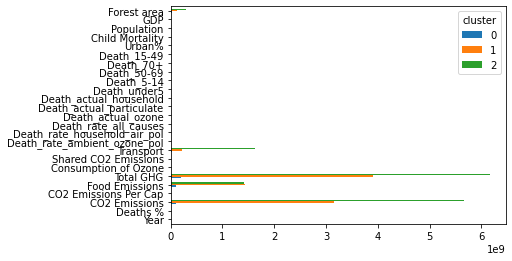

<Figure size 2880x1440 with 0 Axes>

In [39]:
kahuna.groupby('cluster').mean().T.plot(kind='barh')
plt.figure(figsize=(40,20))


In [22]:
lis = [1,2,3,4,4]
lis.reverse()
lis

[4, 4, 3, 2, 1]

In [23]:
rev_columns = list(columns.astype(str))
rev_columns.reverse()

In [24]:
china = kahuna[kahuna['Entity'] == 'China']

Text(0.5, 1.0, 'China: Death % over Time')

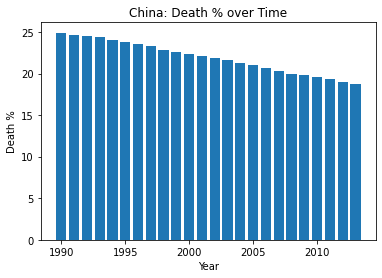

In [25]:
plt.bar(china['Year'], china['Deaths %'])
plt.xlabel('Year')
plt.ylabel('Death %')
plt.title('China: Death % over Time')

Text(0.5, 1.0, 'China: Death % over Time')

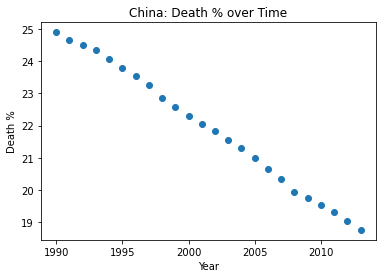

In [37]:
plt.scatter(china['Year'], china['Deaths %'])
plt.xlabel('Year')
plt.ylabel('Death %')
plt.title('China: Death % over Time')

In [38]:
colors = ["red", "green", "blue"]
china['color'] = china['cluster'].map(lambda p: colors[p])

ax = china.plot(    
    kind="scatter", 
    x='Deaths %', y='CO2 Emissions',
    figsize=(10,8),
    c = china['color']
)
centroids.plot(
kind="scatter", 
x='Deaths %', y='CO2 Emissions', 
marker="*", c=["maroon", "darkgreen", "navy"], s=550,
ax=ax);

C:\Users\saraz\AppData\Local\Temp/ipykernel_12208/1607540067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china['color'] = china['cluster'].map(lambda p: colors[p])


C:\Users\saraz\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


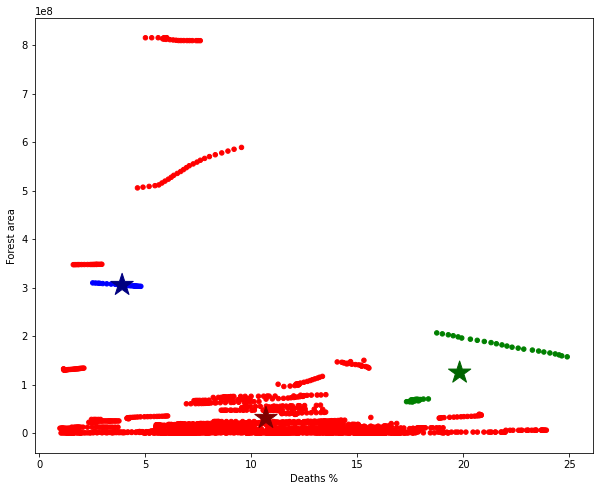

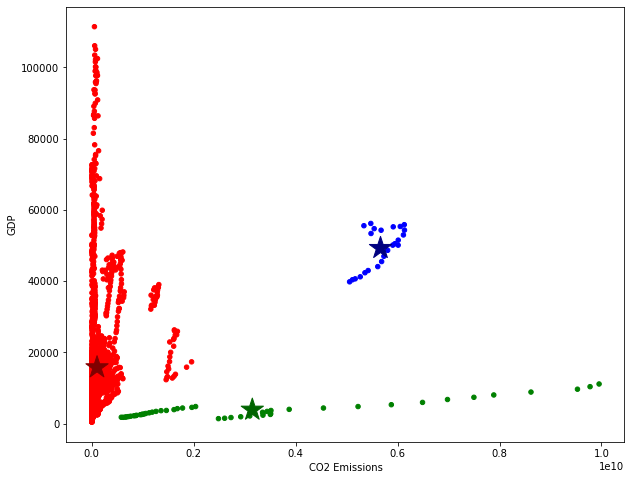

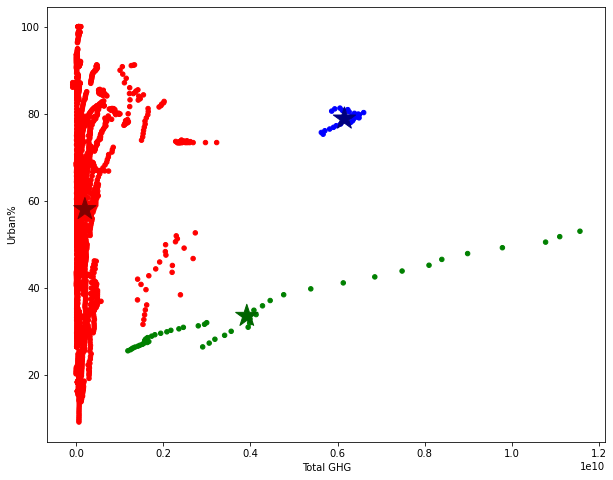

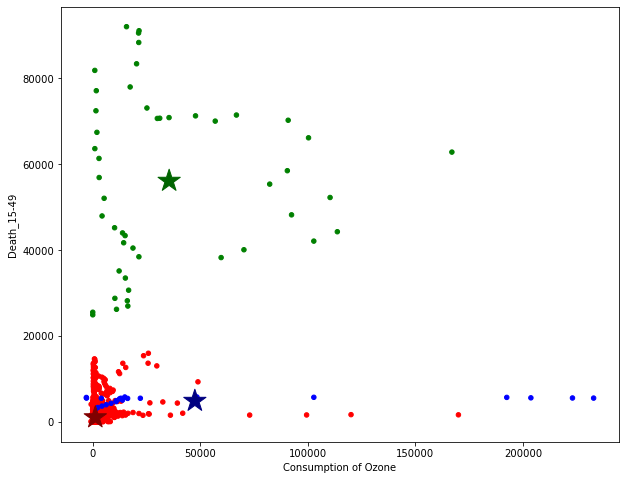

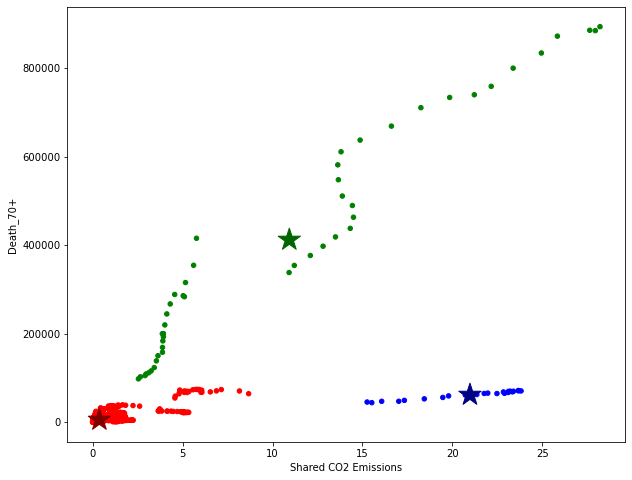

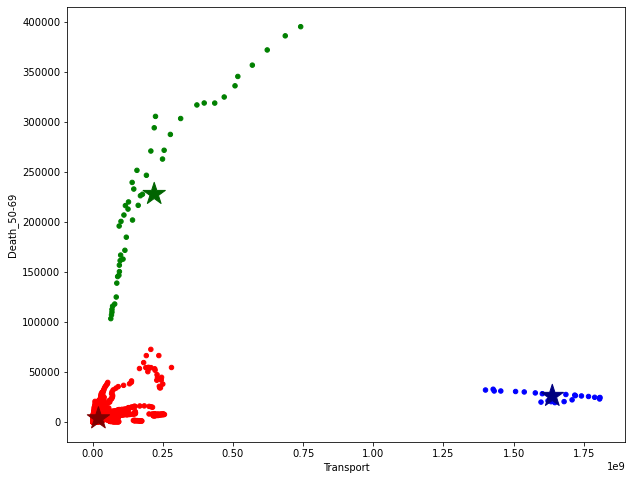

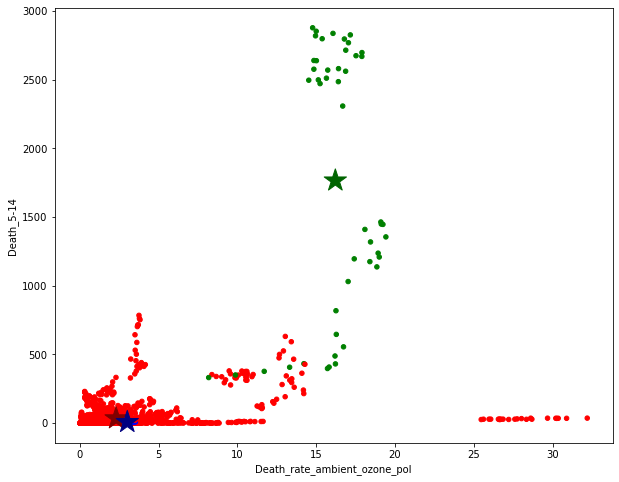

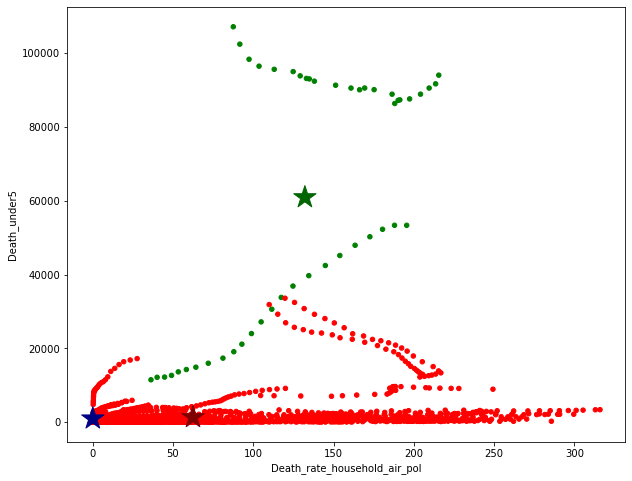

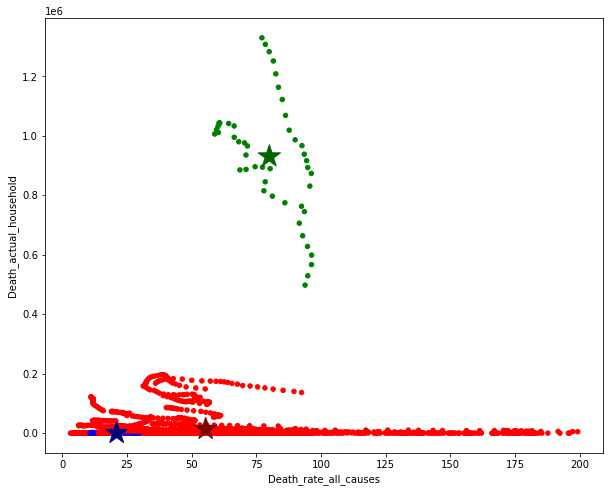

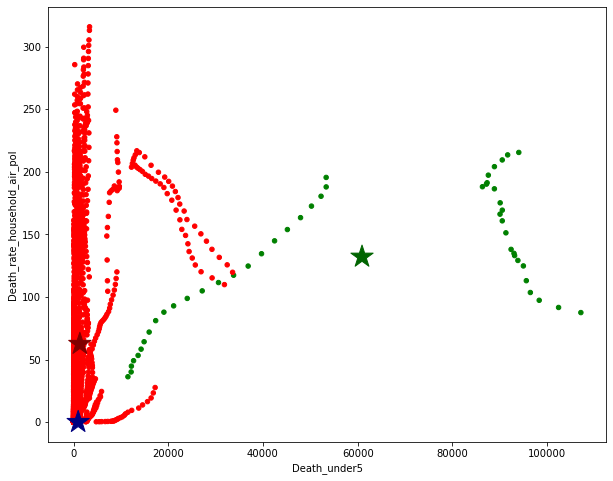

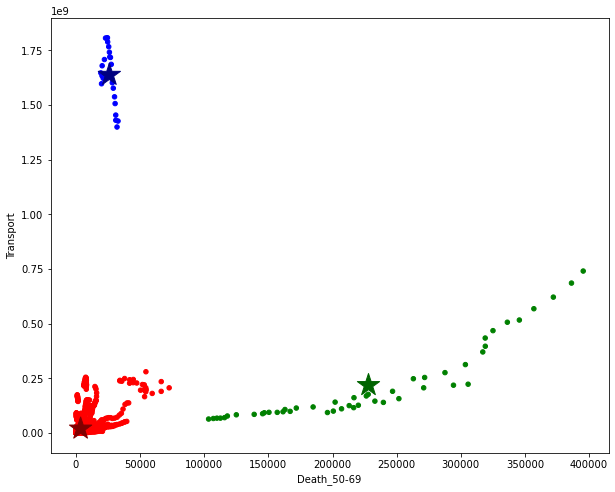

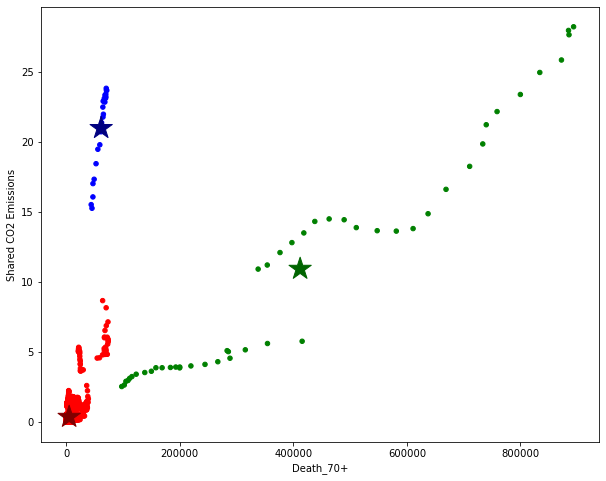

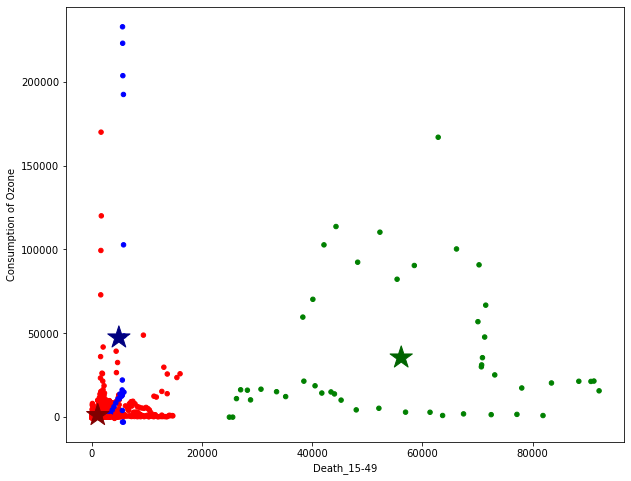

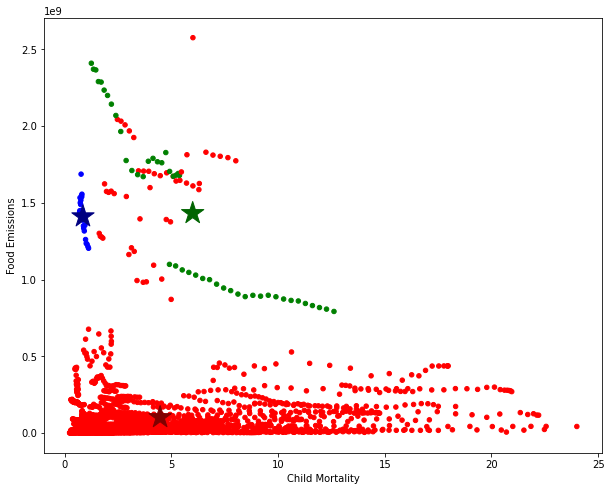

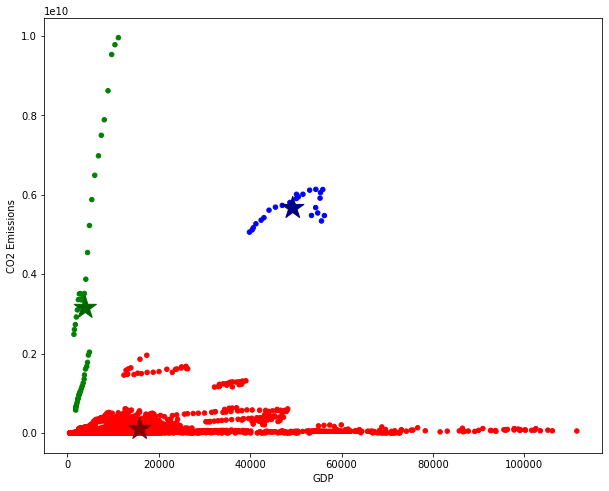

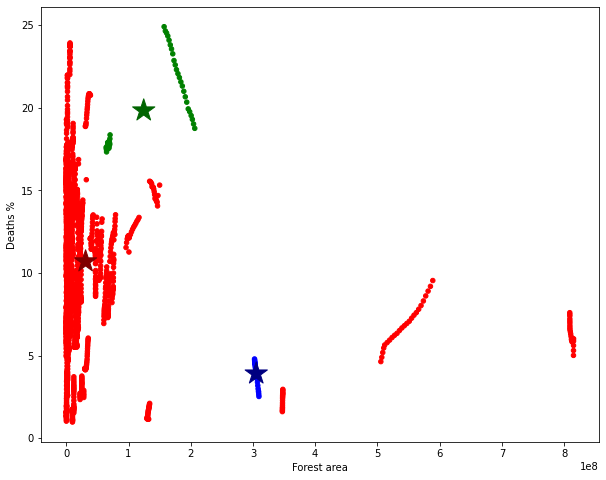

In [39]:
for x, y in zip(columns, rev_columns):
    colors = ["red", "green", "blue"]
    kahuna['color'] = kahuna['cluster'].map(lambda p: colors[p])

    ax = kahuna.plot(    
        kind="scatter", 
        x=x, y=y,
        figsize=(10,8),
        c = kahuna['color']
    )
    centroids.plot(
    kind="scatter", 
    x=x, y=y, 
    marker="*", c=["maroon", "darkgreen", "navy"], s=550,
    ax=ax
    );

In [54]:
from mpl_toolkits import mplot3d

In [ ]:
#gaussian models, spectral models, ward, aglomartive(egglomartive), optics

# Hierarchical Clustering

In [151]:
h_df = X_sc.copy()

In [152]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [154]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(h_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(h_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9276168231216942.
Cophenetic correlation for Euclidean distance and complete linkage is 0.9163880187828435.
Cophenetic correlation for Euclidean distance and average linkage is 0.9491166475042377.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9234027224591498.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9030828822824957.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8606130763865654.
Cophenetic correlation for Chebyshev distance and average linkage is 0.888967174686825.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8435753578297.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8314667247335189.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8243003396358517.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8946693898070961.
Cophenetic correl

In [155]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9491166475042377, which is obtained with Euclidean distance and average linkage.


In [156]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(h_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(h_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9276168231216942.
Cophenetic correlation for complete linkage is 0.9163880187828435.
Cophenetic correlation for average linkage is 0.9491166475042377.
Cophenetic correlation for centroid linkage is 0.9495093656172966.
Cophenetic correlation for ward linkage is 0.6908577248991543.
Cophenetic correlation for weighted linkage is 0.9234027224591498.


In [157]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9495093656172966, which is obtained with centroid linkage.


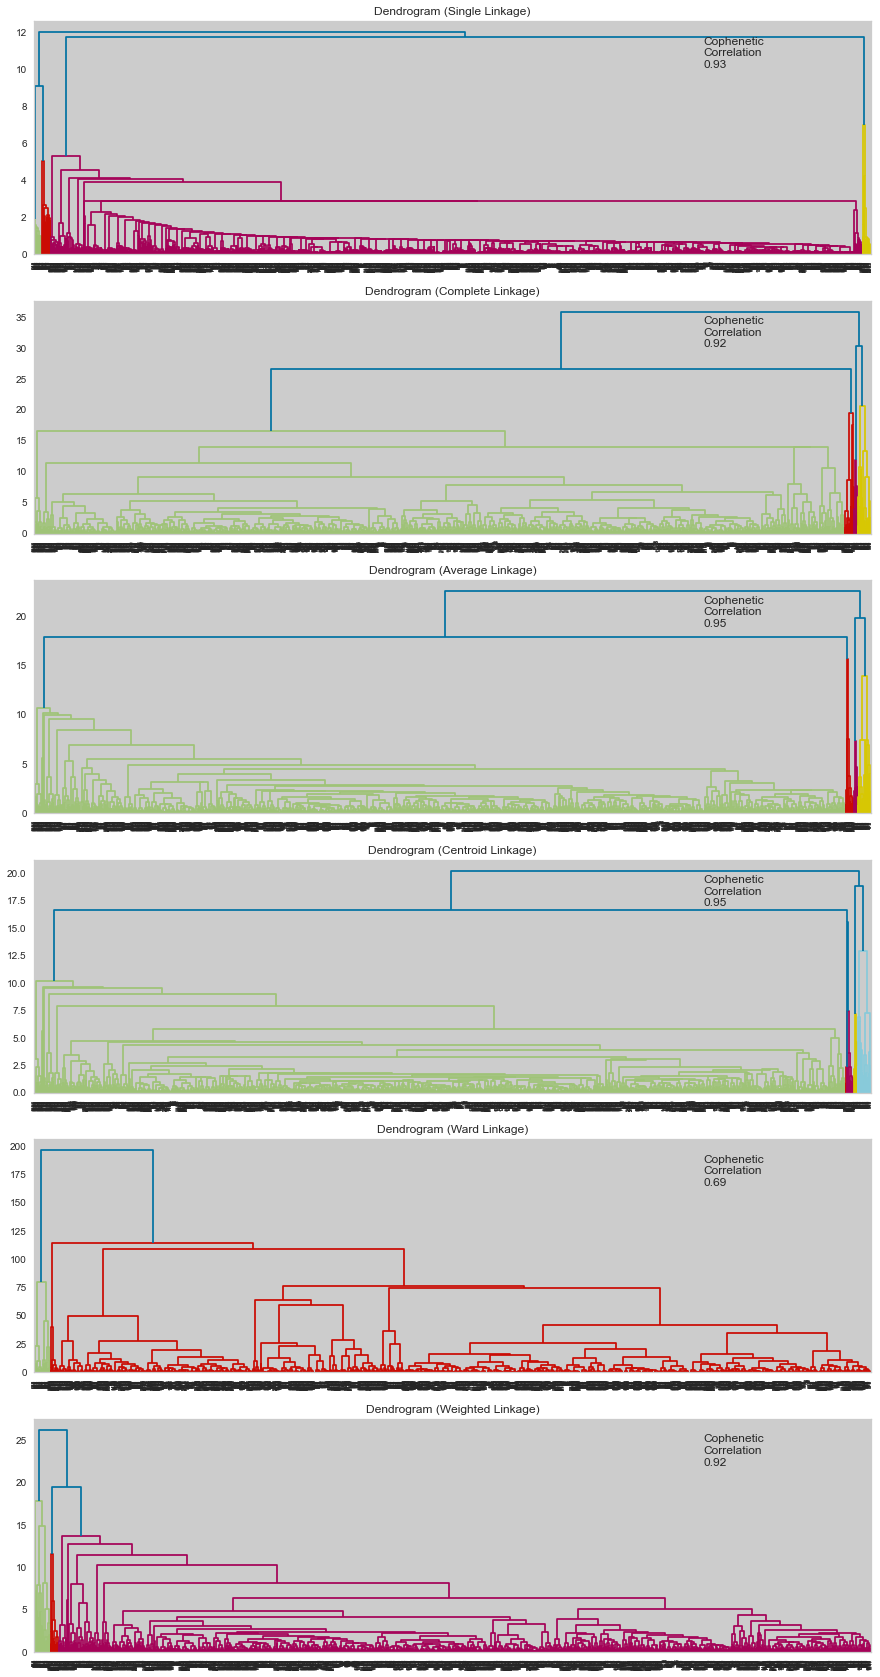

In [158]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))


# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(h_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(h_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [160]:
df_hc = pd.DataFrame(compare, columns = compare_cols)
df_hc = df_hc.sort_values(by = 'Cophenetic Coefficient')

In [161]:
df_hc

Linkage  Cophenetic Coefficient
4      ward                0.690858
1  complete                0.916388
5  weighted                0.923403
0    single                0.927617
2   average                0.949117
3  centroid                0.949509

In [162]:
from sklearn.cluster import AgglomerativeClustering

In [163]:


H_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
H_model.fit(h_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [164]:
h_df = pd.DataFrame(h_df, columns = X.columns)

In [188]:
h_df['hc_segments'] = H_model.labels_
df1['hc_segments'] = H_model.labels_

h_df['km_labels'] = km.labels_
df1['km_labels'] = km.labels_

<AxesSubplot:xlabel='hc_segments'>

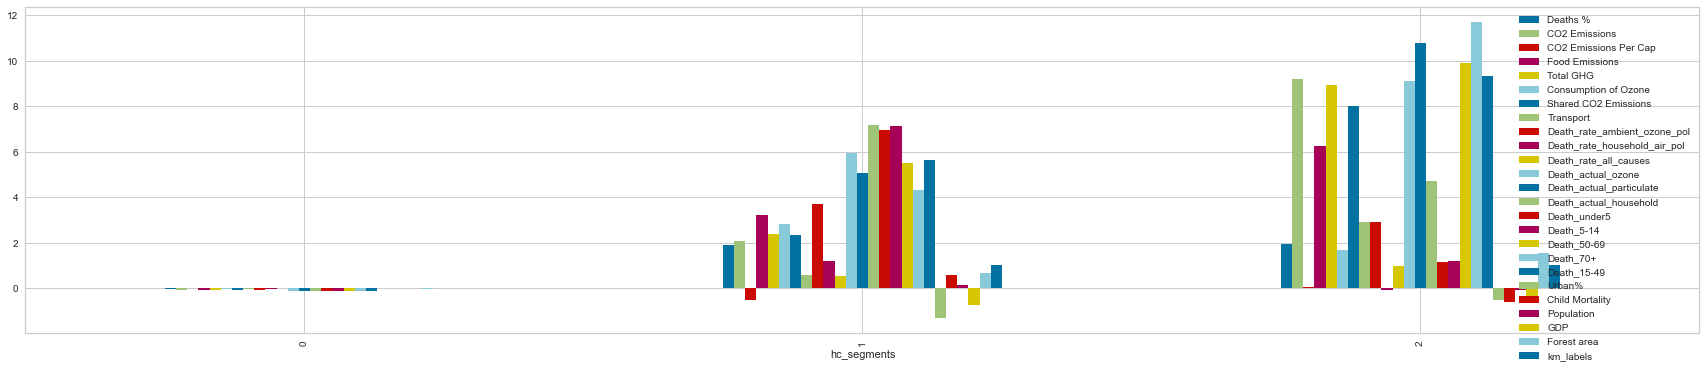

In [172]:
h_df.groupby("hc_segments").mean().plot.bar(figsize=(30, 6))

In [200]:
h_df.groupby("km_labels").mean().plot.bar(figsize=(30, 6))

<AxesSubplot:xlabel='km_labels'>

In [177]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=X[X.columns[counter]], x=h_df["hc_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)
plt.savefig('HI_CL.jpg', dpi = 250)

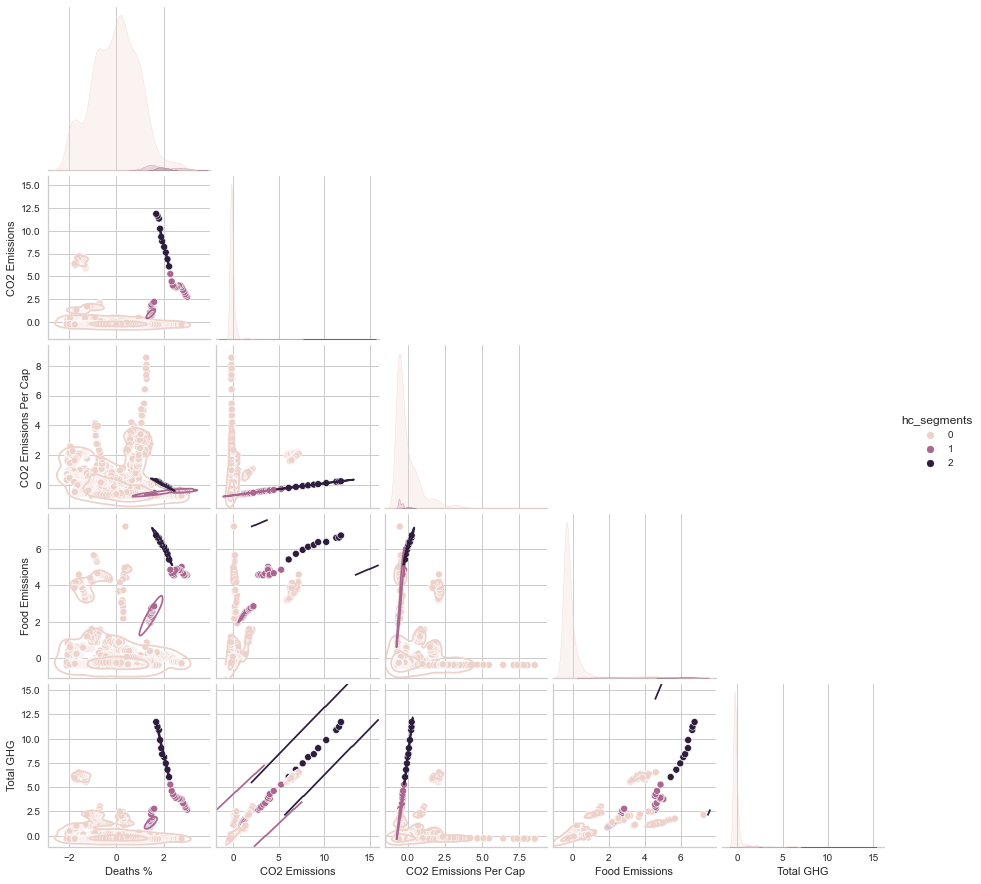

<Figure size 576x396 with 0 Axes>

In [181]:
g = sns.pairplot(
    h_df[
        ['Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap', 'Food Emissions',
       'Total GHG','hc_segments'
        ]
    ],
    diag_kind="kde",
    corner=True,
    hue="hc_segments",
)
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()
plt.savefig('pair_hc_sagement.jpg', dpi = 250)

-------------------------

## All Countries

In [119]:
countries_dfs = [pd.DataFrame(kahuna[kahuna['Entity'] == x]) for x in list(kahuna['Entity'].unique())]

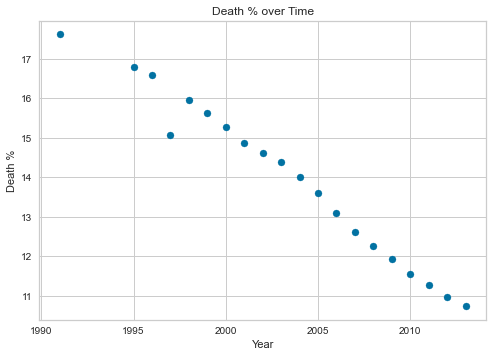

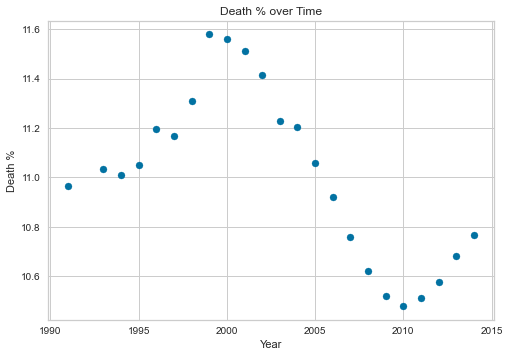

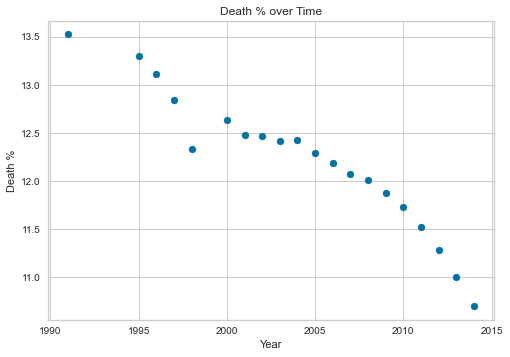

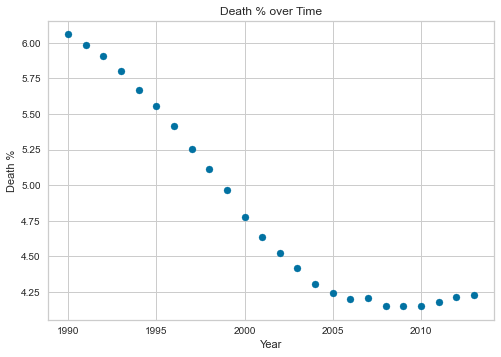

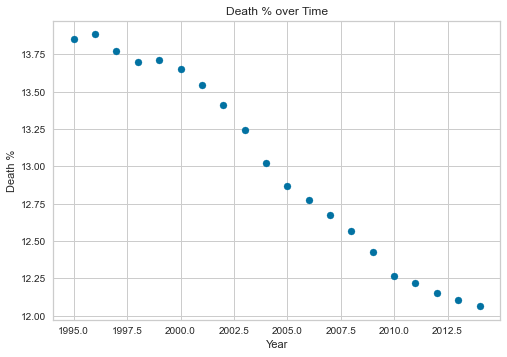

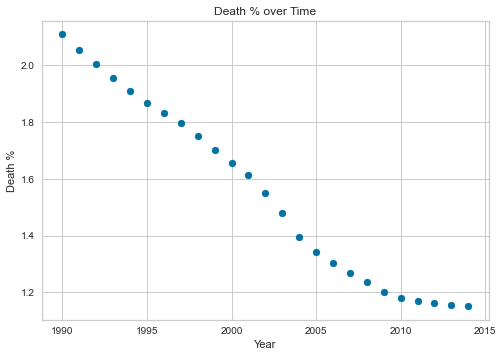

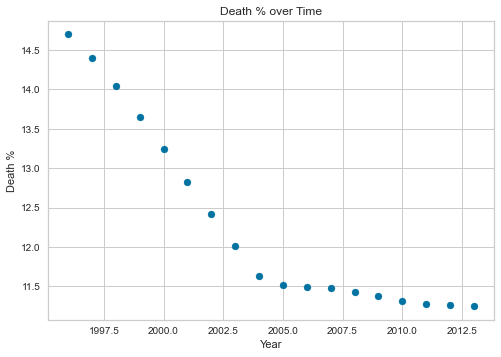

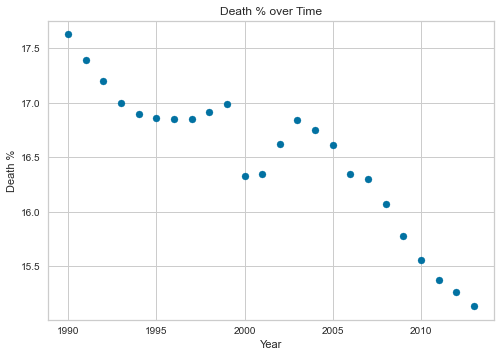

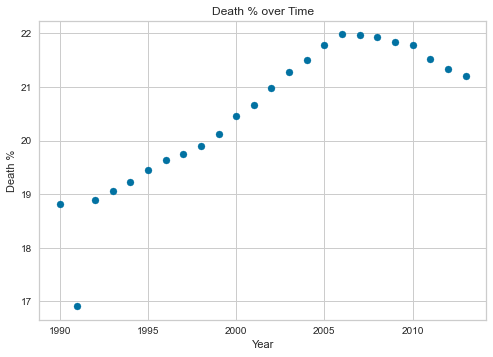

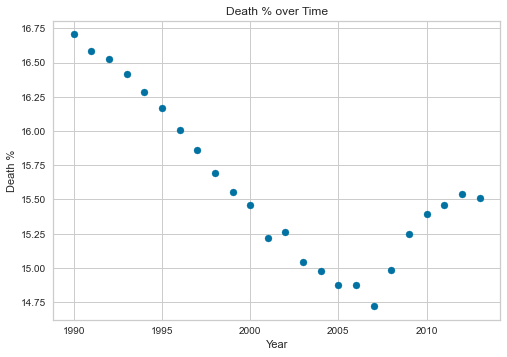

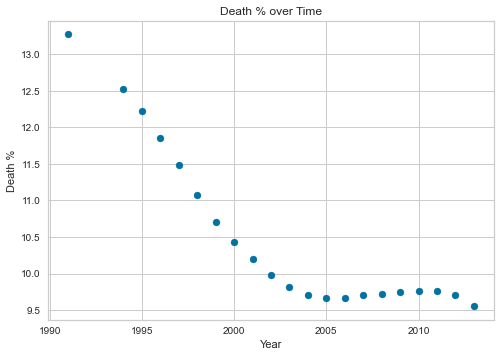

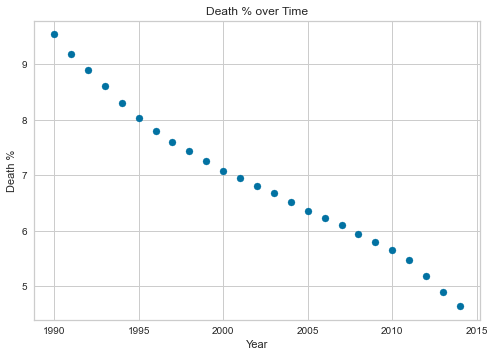

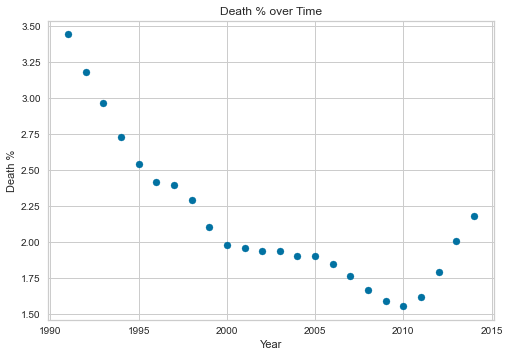

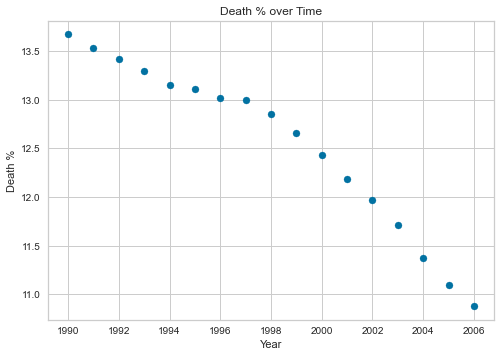

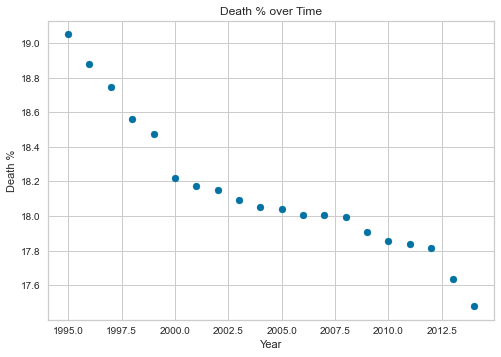

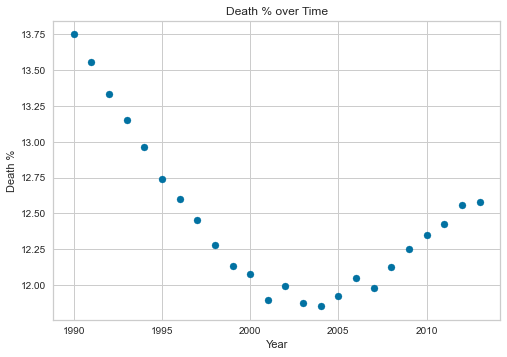

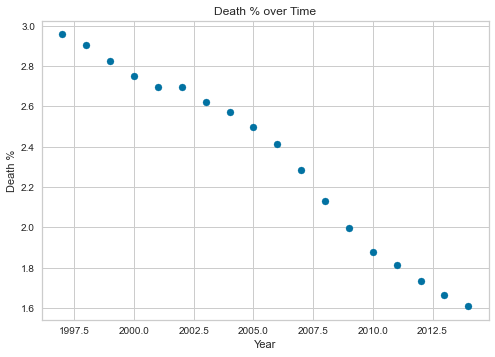

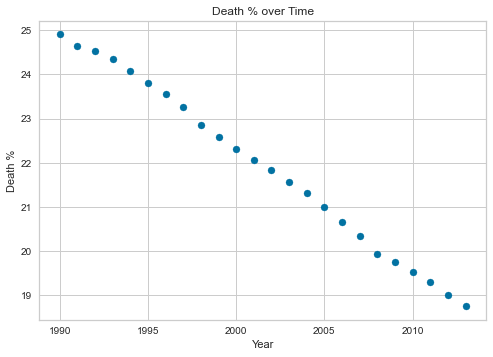

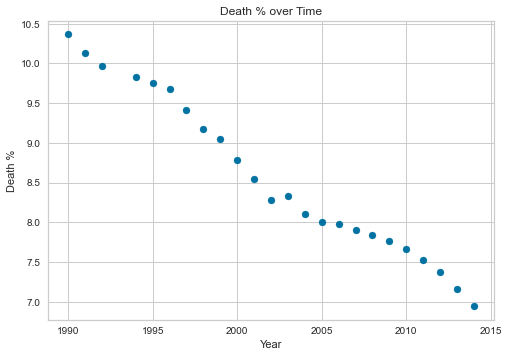

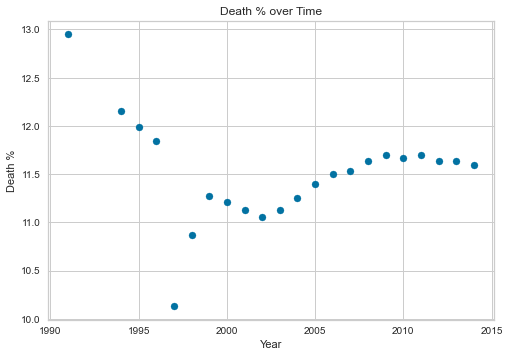

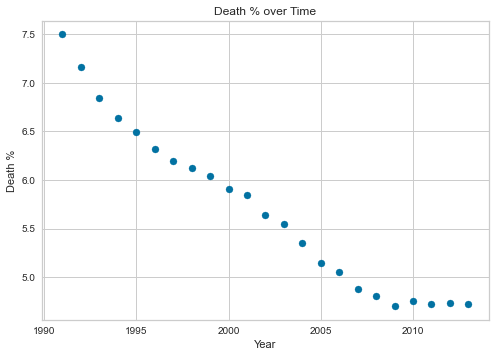

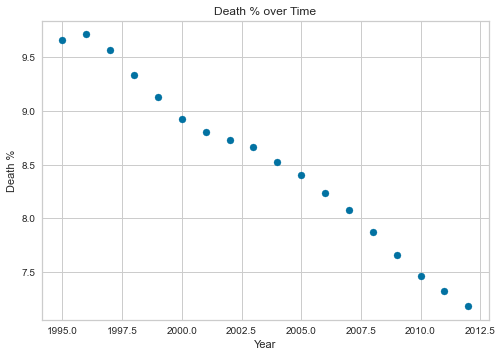

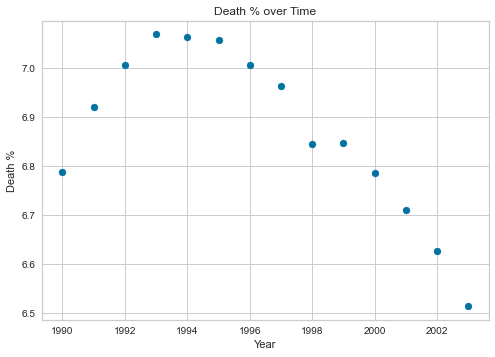

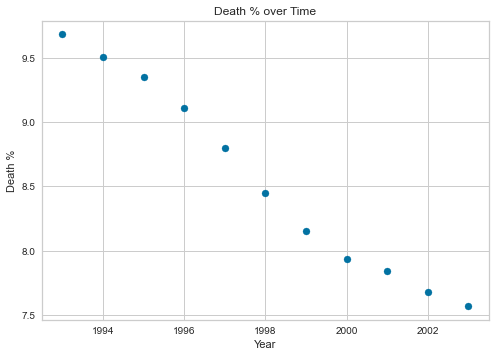

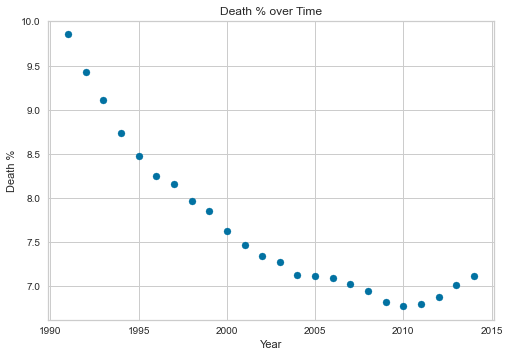

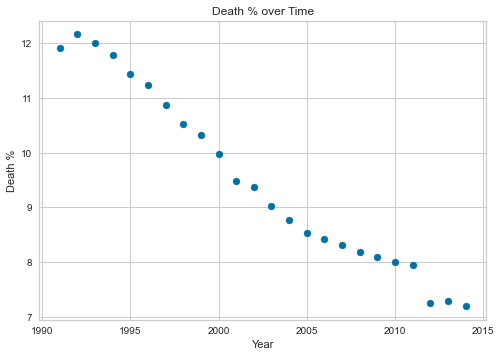

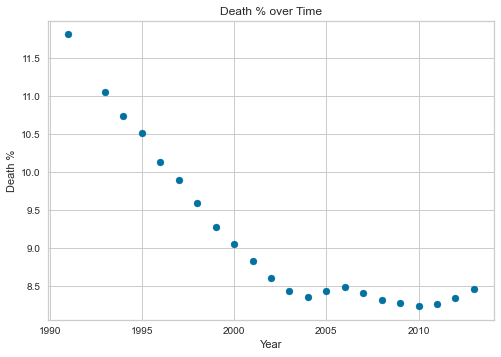

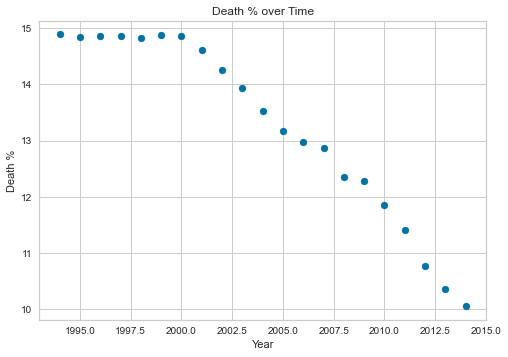

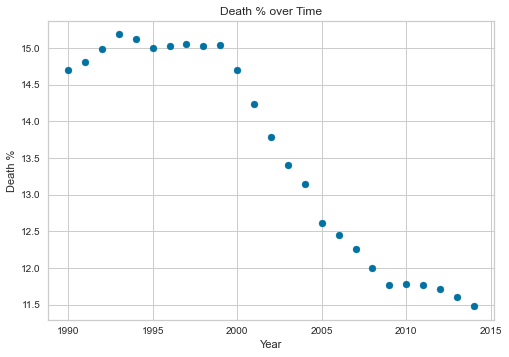

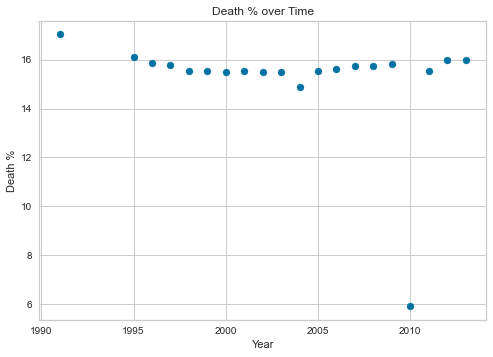

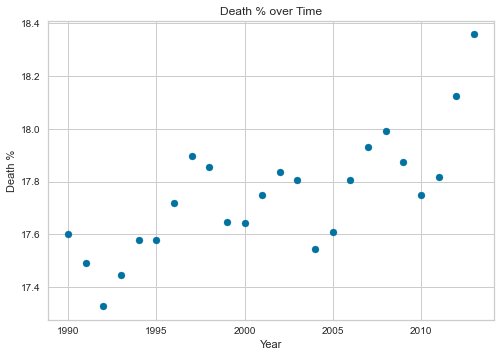

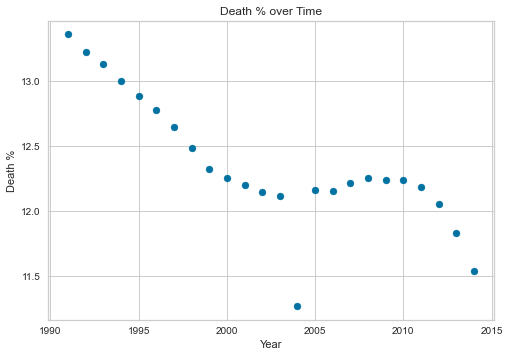

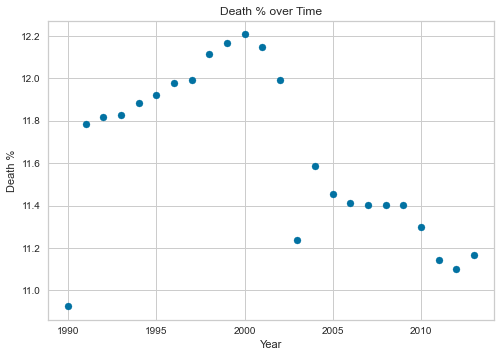

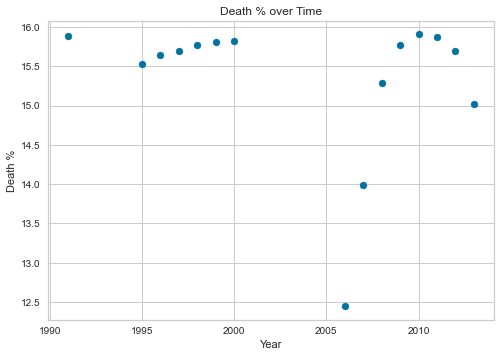

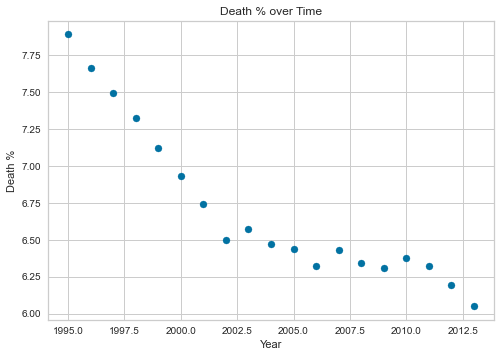

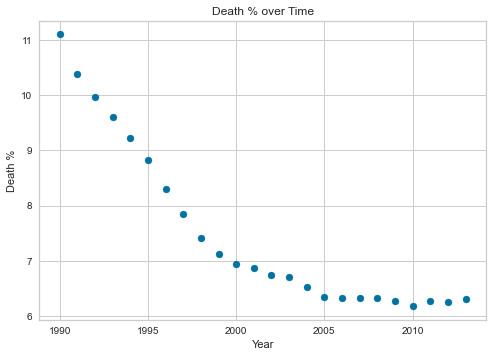

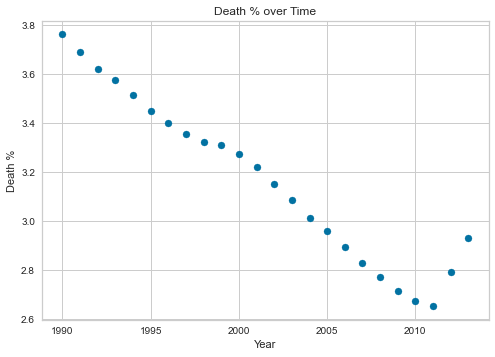

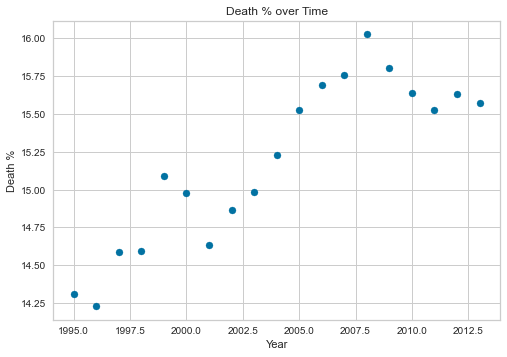

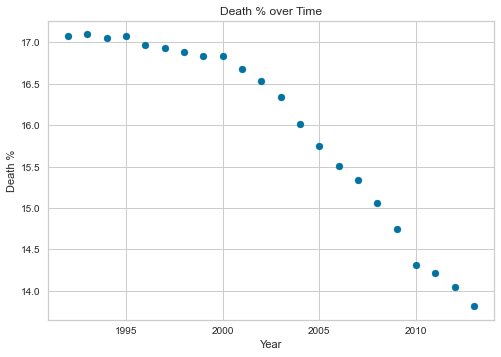

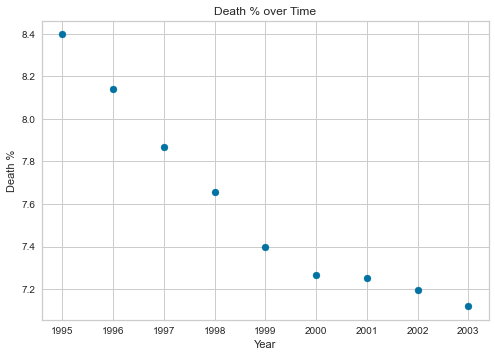

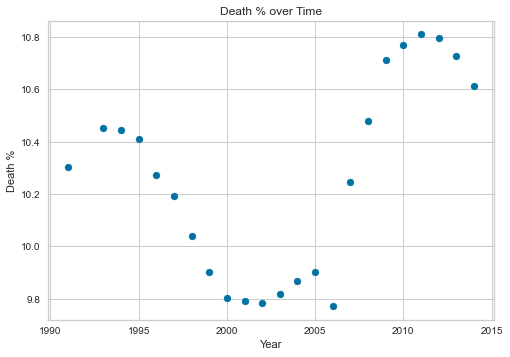

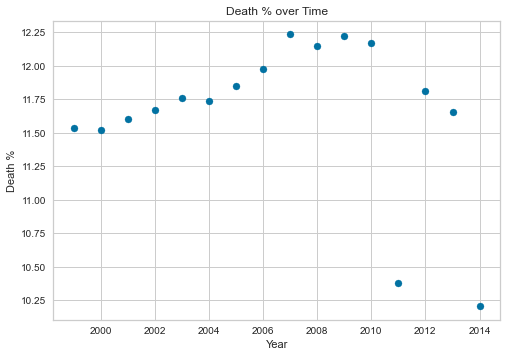

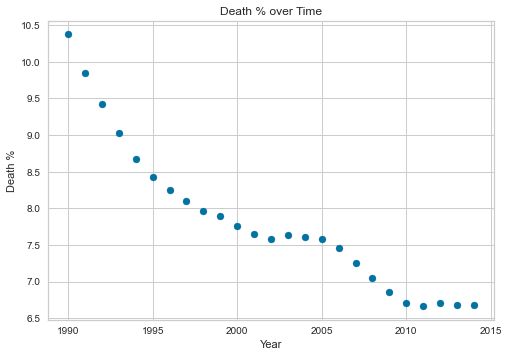

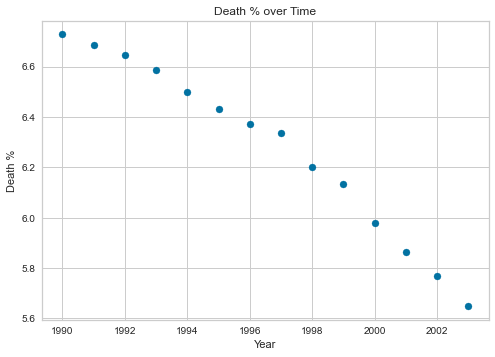

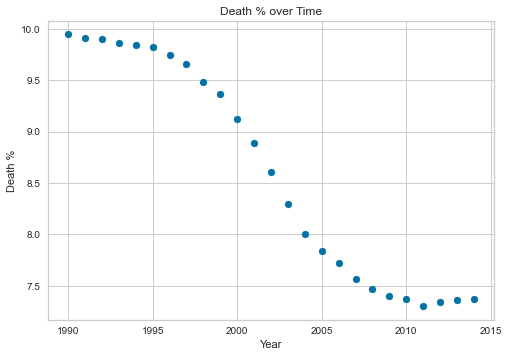

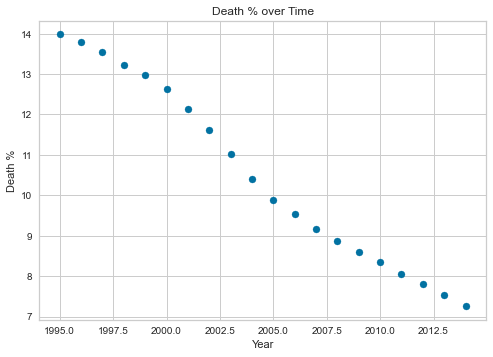

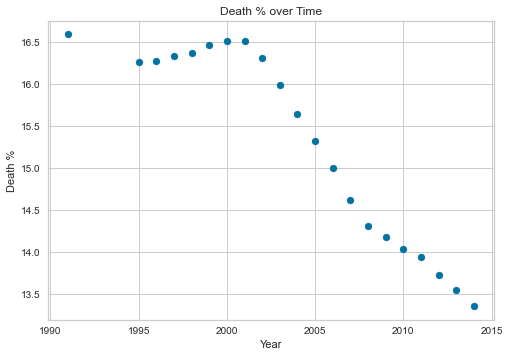

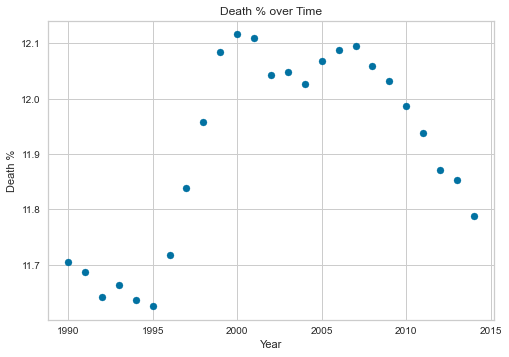

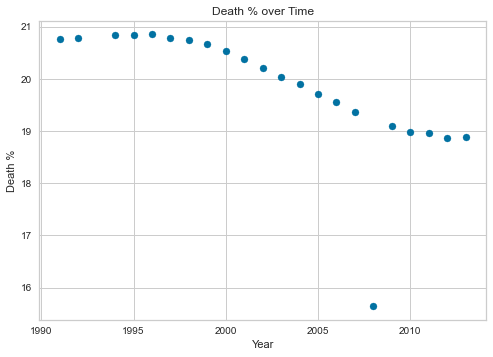

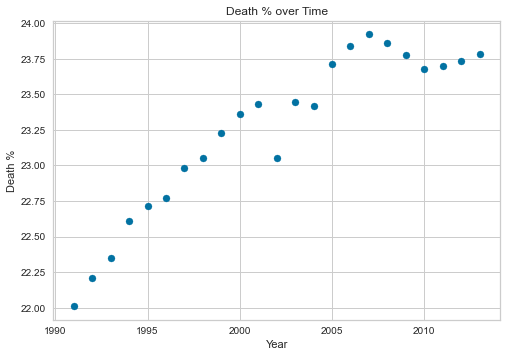

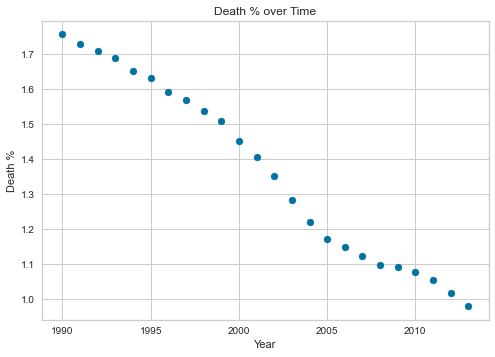

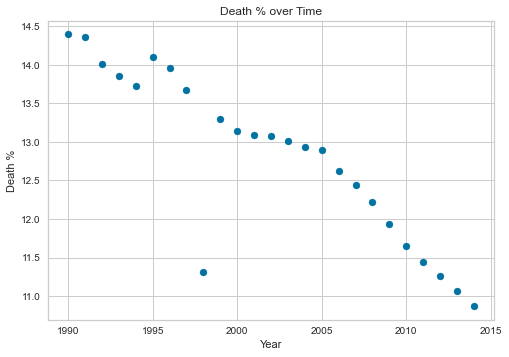

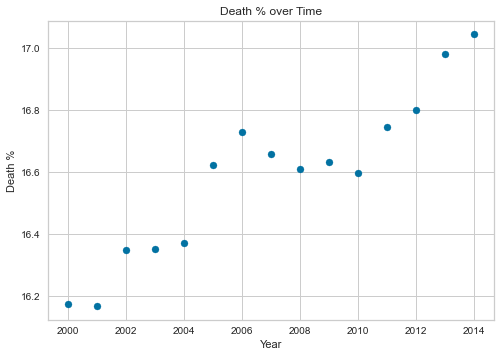

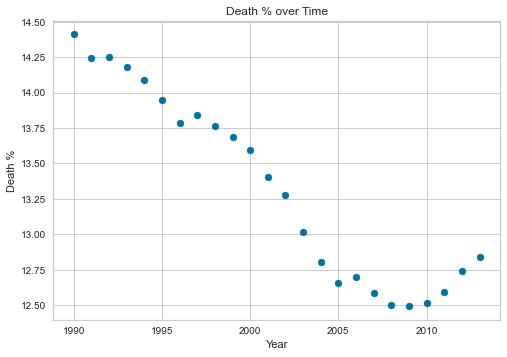

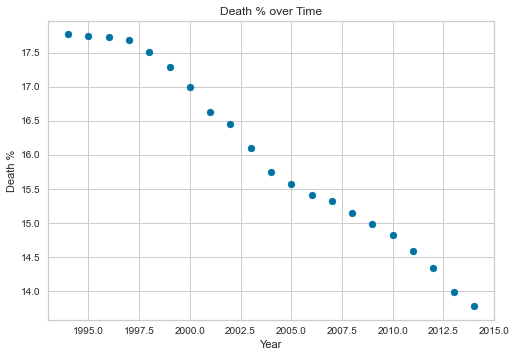

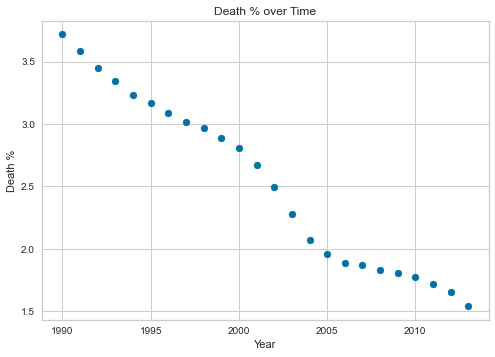

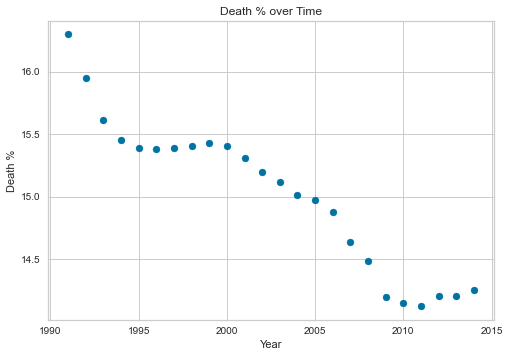

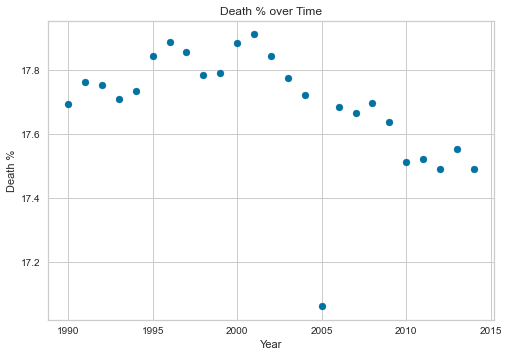

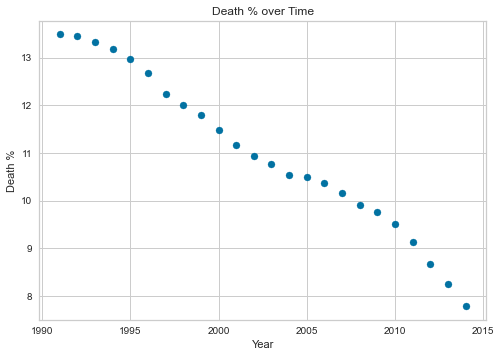

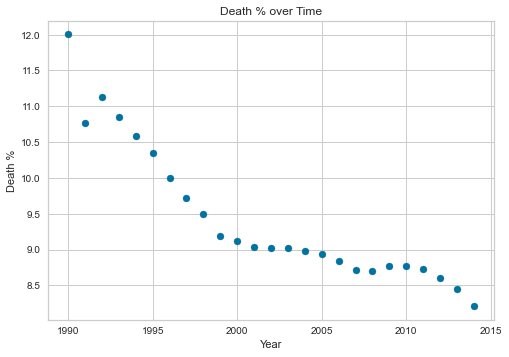

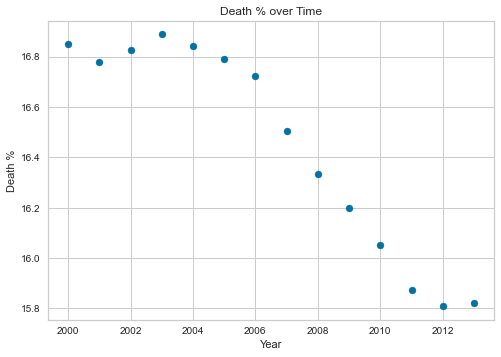

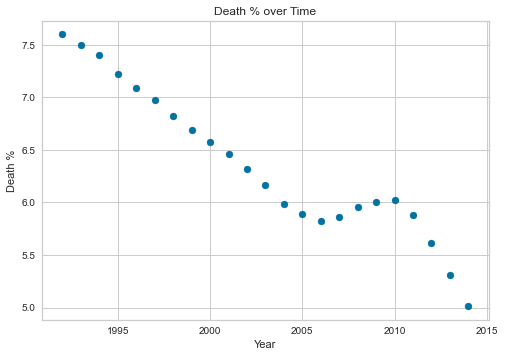

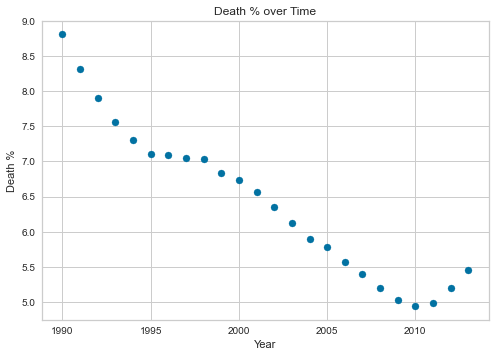

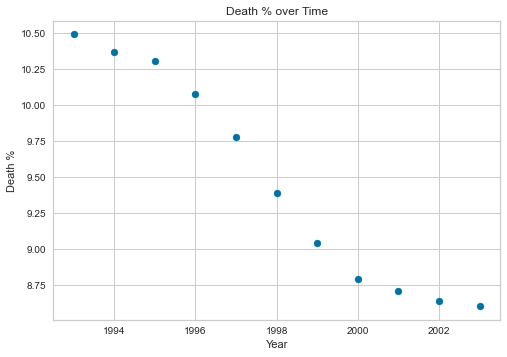

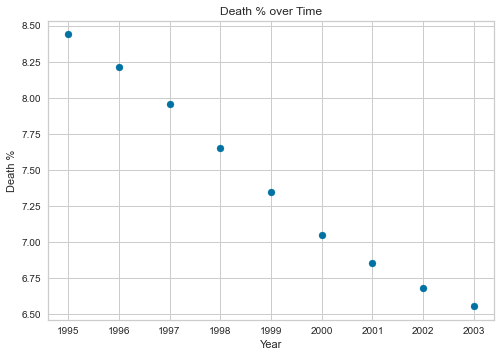

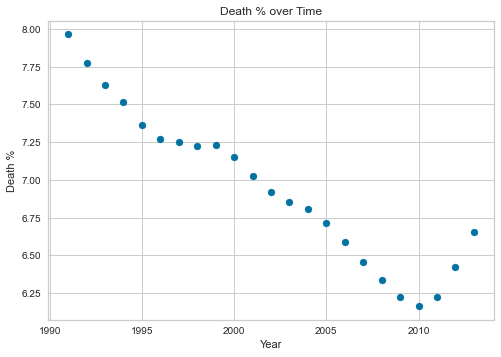

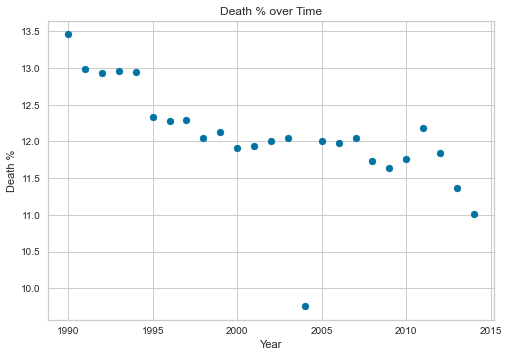

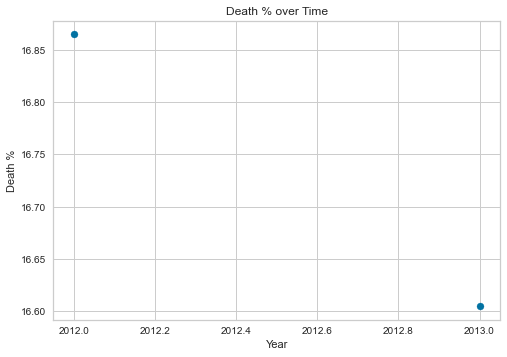

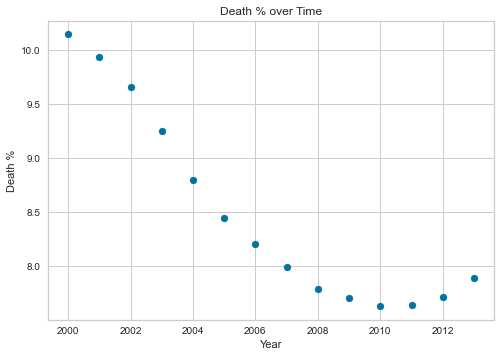

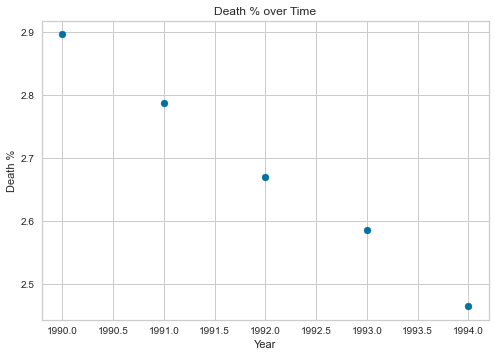

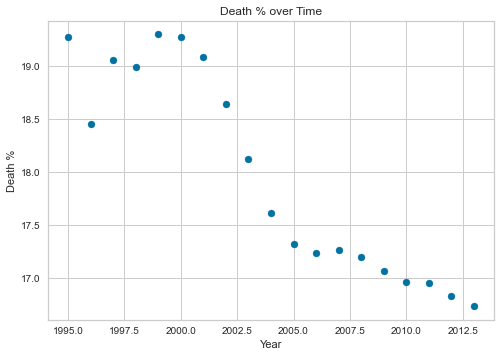

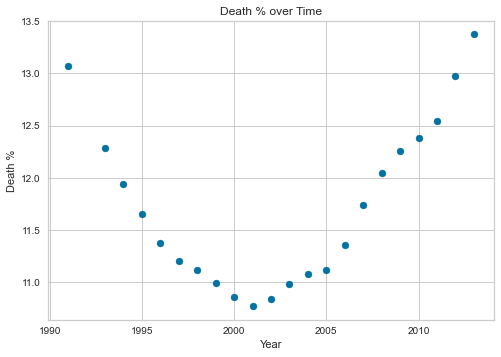

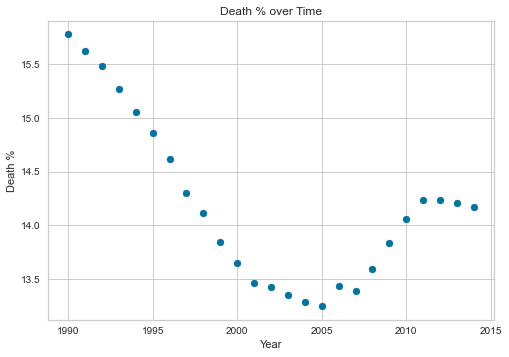

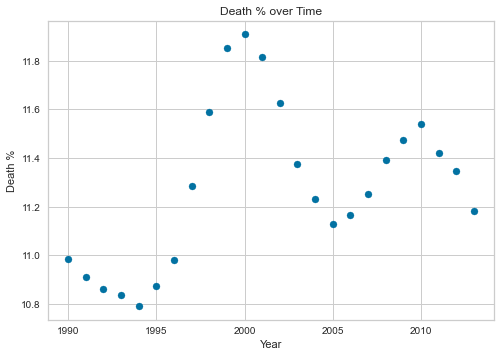

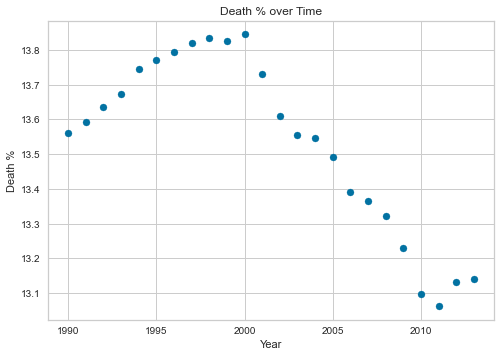

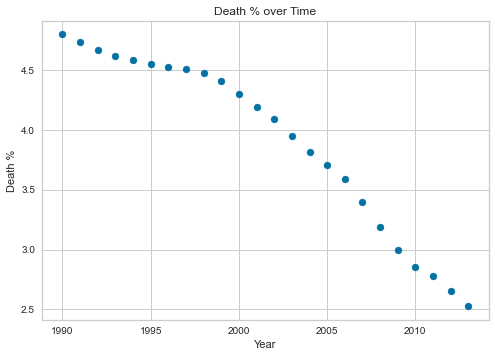

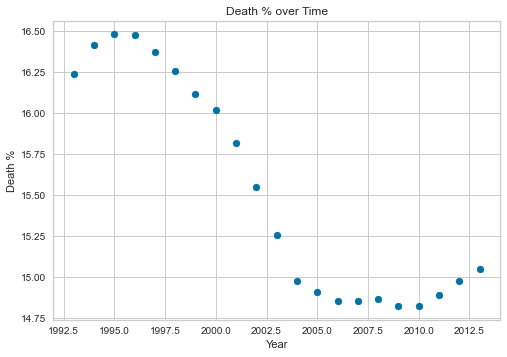

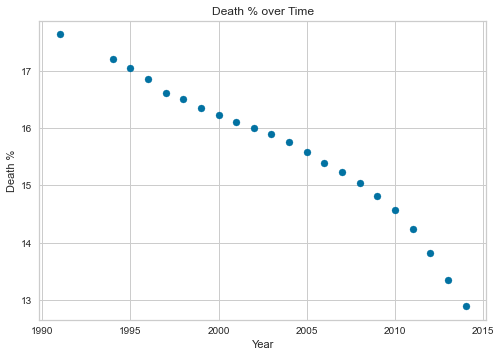

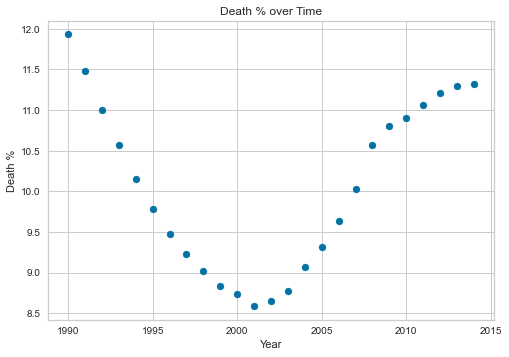

In [120]:
for x in countries_dfs:
    #country = str(x['Entity'][1])
    plt.scatter(x['Year'], x['Deaths %'])
    plt.xlabel('Year')
    plt.ylabel('Death %')
    plt.title('Death % over Time')
    plt.show();

In [121]:
kahuna.columns

Index(['Entity', 'Year', 'Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap',
       'Food Emissions', 'Total GHG', 'Consumption of Ozone',
       'Shared CO2 Emissions', 'Transport', 'Death_rate_ambient_ozone_pol',
       'Death_rate_household_air_pol', 'Death_rate_all_causes',
       'Death_actual_ozone', 'Death_actual_particulate',
       'Death_actual_household', 'Death_under5', 'Death_5-14', 'Death_50-69',
       'Death_70+', 'Death_15-49', 'Urban%', 'Child Mortality', 'Population',
       'GDP', 'Forest area', 'cluster'],
      dtype='object')

In [122]:
for x in countries_dfs:
    ax = plt.axes(projection='3d')

    # Data for a three-dimensional line
    zline = x['Year']
    xline = x['Deaths %']
    yline = x['CO2 Emissions']
    ax.plot3D(xline, yline, zline, 'gray')

    # Data for three-dimensional scattered points
    zdata = x['Year']
    xdata = x['Deaths %']
    ydata = x['CO2 Emissions']

    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
    
    ax.show();

AttributeError: 'Axes3DSubplot' object has no attribute 'show'

In [123]:
china.columns

NameError: name 'china' is not defined

In [124]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(china['Transport'], china['CO2 Emissions'], asdf, color='black')
ax.set_title('wireframe');

NameError: name 'china' is not defined

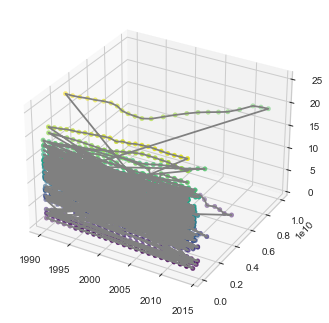

In [125]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = kahuna['Deaths %']
xline = kahuna['Year']
yline = kahuna['CO2 Emissions']
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = kahuna['Deaths %']
xdata = kahuna['Year']
ydata = kahuna['CO2 Emissions']

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');

In [126]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [127]:
albania = kahuna[kahuna['Entity'] == 'Albania']

In [128]:
ax = px.scatter_3d(china, x='Deaths %', y='CO2 Emissions', z='Year')
fig = px.scatter_3d(albania, x='Deaths %', y='CO2 Emissions', z='Year')
fig.show();

NameError: name 'china' is not defined

In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=1, cols=2)

# adding surfaces to subplots.
fig.add_trace(
    px.scatter_3d(china, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=1)

fig.add_trace(
    px.scatter_3d(albania, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=2)

fig.show()

NameError: name 'china' is not defined

In [ ]:
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(cols=2)

fig.add_trace(
    px.scatter_3d(china, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=1
)

fig.add_trace(
    px.scatter_3d(albania, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=2
)

In [130]:
trace1 = go.Bar(
    x=china['Year'],
    y=china['Deaths %']
)
trace2 = go.Bar(
    x=albania['Year'],
    y=albania['Deaths %']
)

NameError: name 'china' is not defined

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.update_layout(xaxis=dict(tickangle=90))
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(px.scatter_3d(china, x='Deaths %', y='Year', z='CO2 Emissions'), row=1, col=1) 
fig.add_trace(px.scatter_3d(albania, x='Deaths %', y='Year', z='CO2 Emissions'), row=1, col=2) 
fig.show()